## Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
## Draw the inferences from the clusters obtained.


## 1. Airlines
Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained.

Data Description:

The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months: cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months: cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000 2 = 5,000 - 10,000 3 = 10,001 - 25,000 4 = 25,001 - 50,000 5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

# 1.Hierarchical clustering

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID#,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


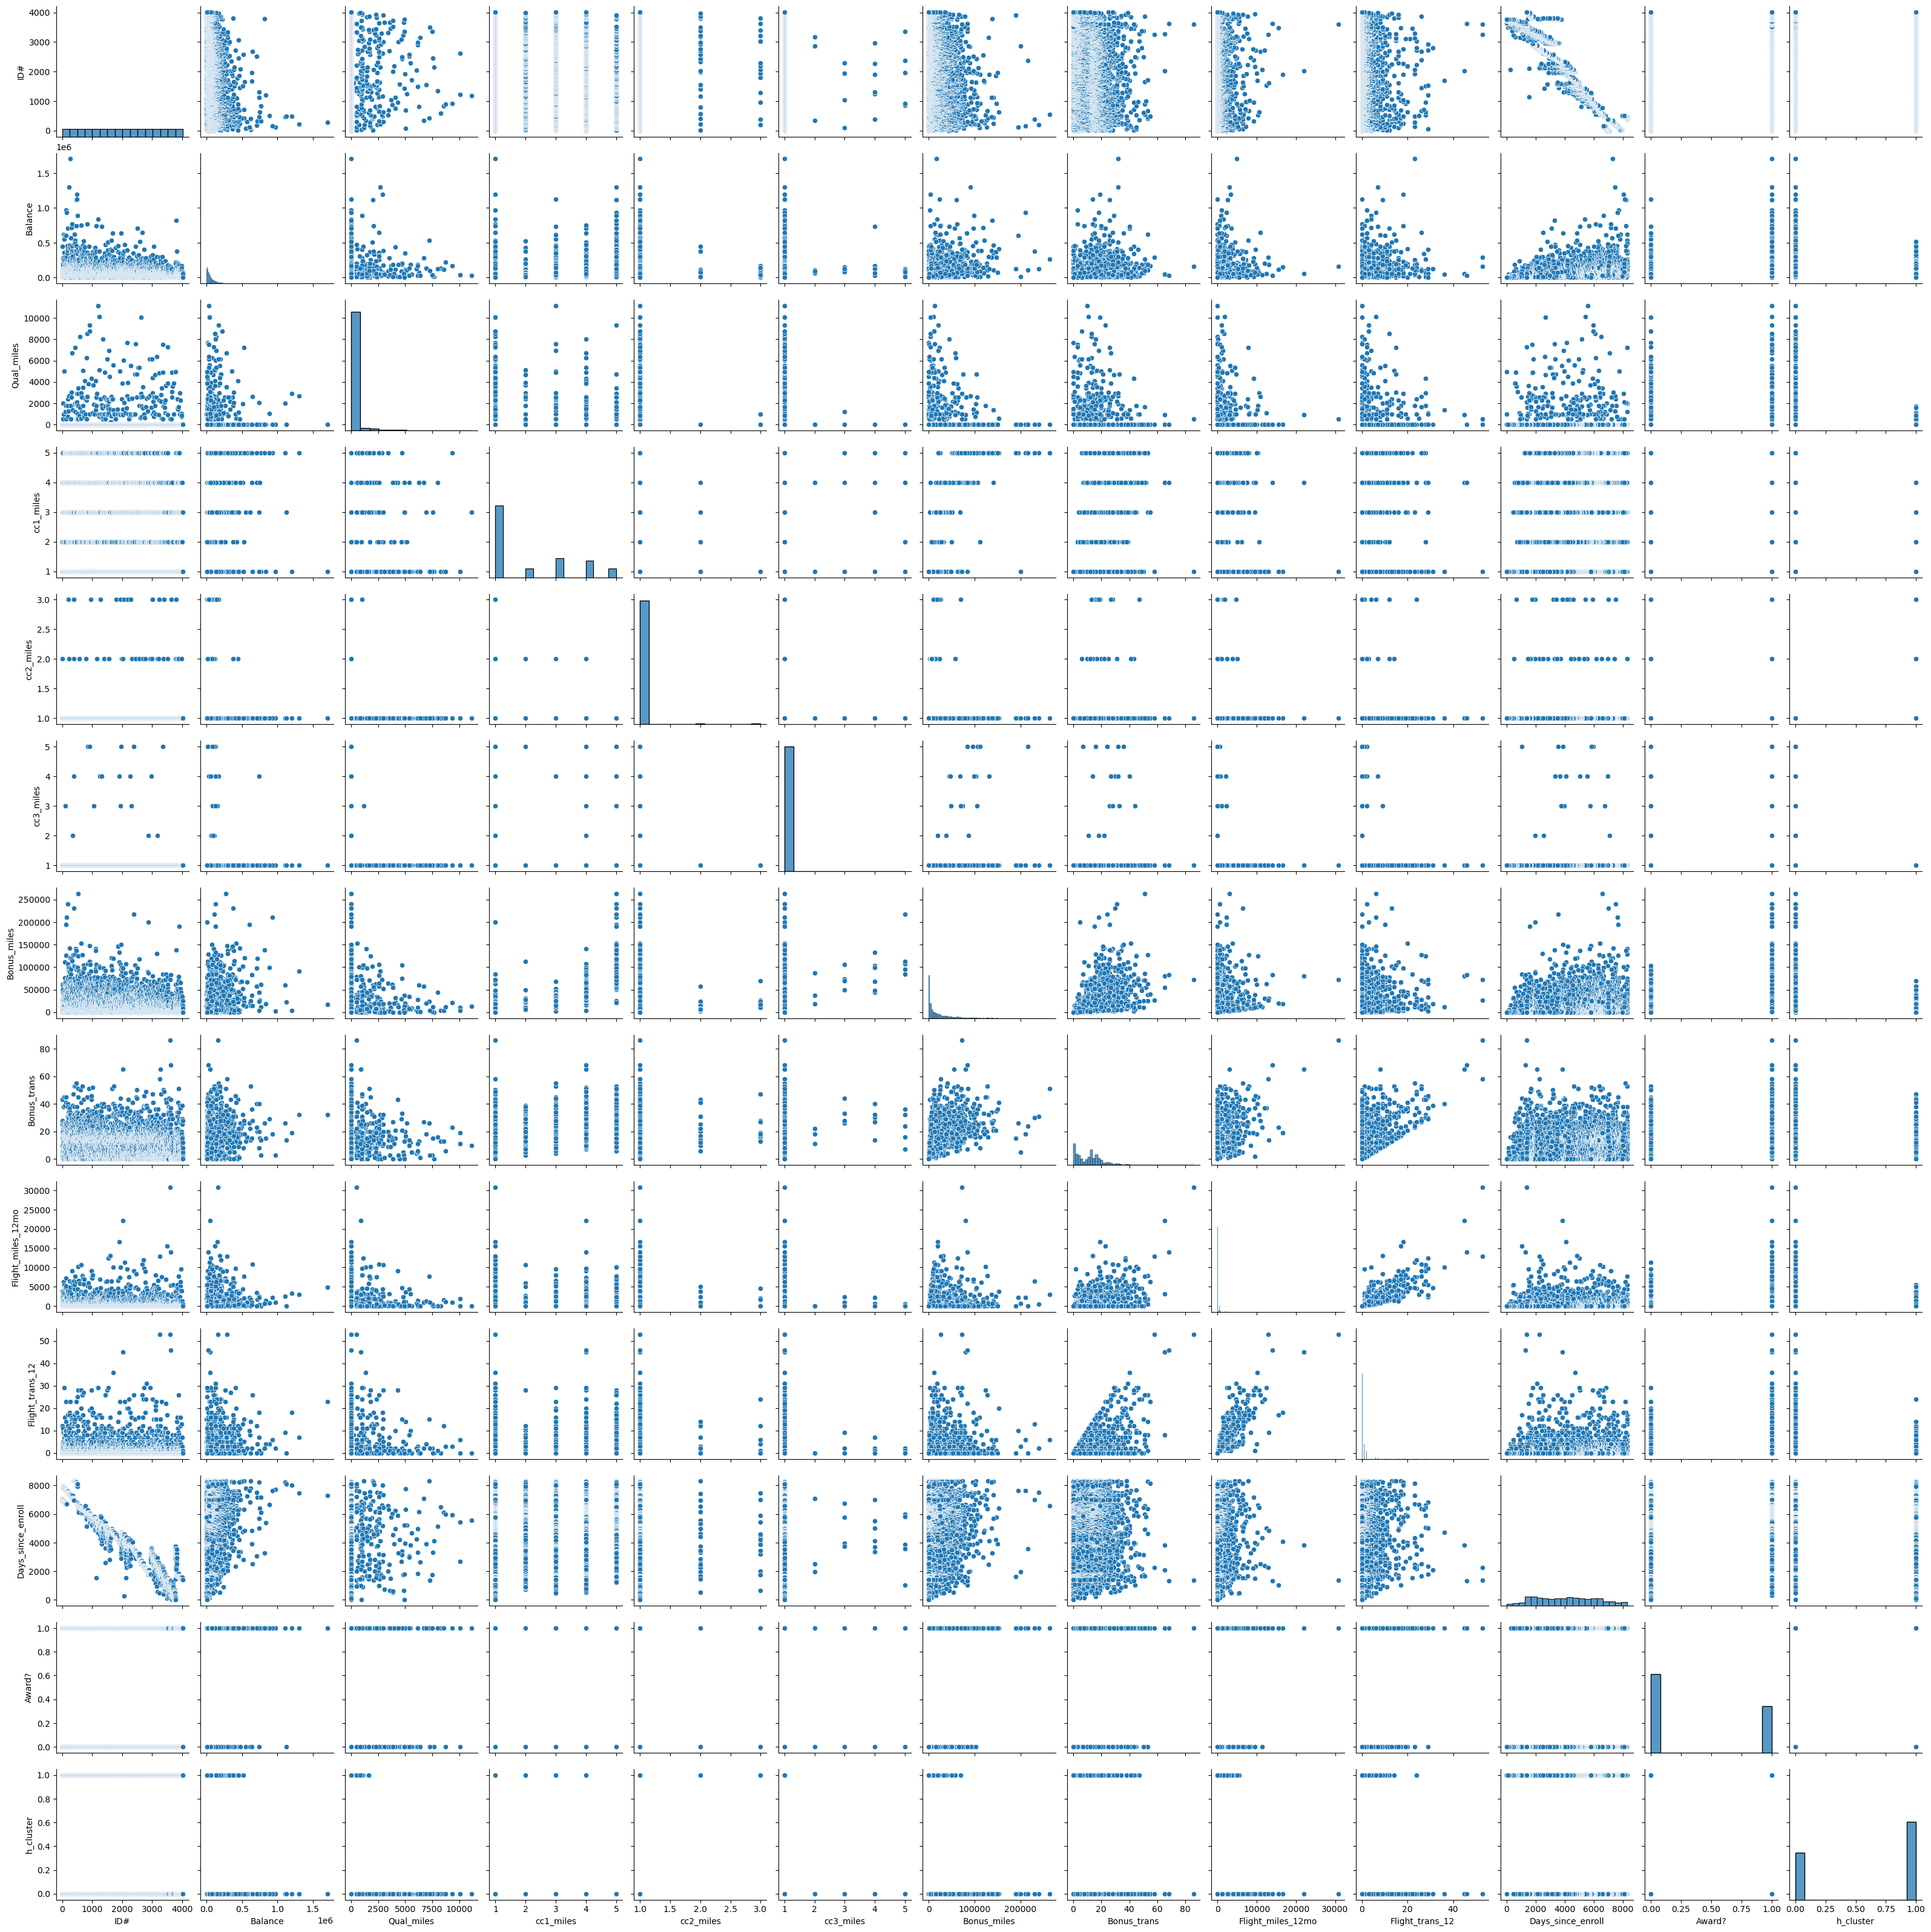

In [37]:
sns.pairplot(df)

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
x = df.iloc[:,1:]

In [7]:
sc = StandardScaler()

x = sc.fit_transform(x)

In [8]:
x = pd.DataFrame(x,columns=df.iloc[:,1:].columns)
x.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


In [9]:
# Creating dendrogram and linkage

In [20]:
from scipy.cluster import hierarchy
lk = hierarchy.linkage(x,method='complete')

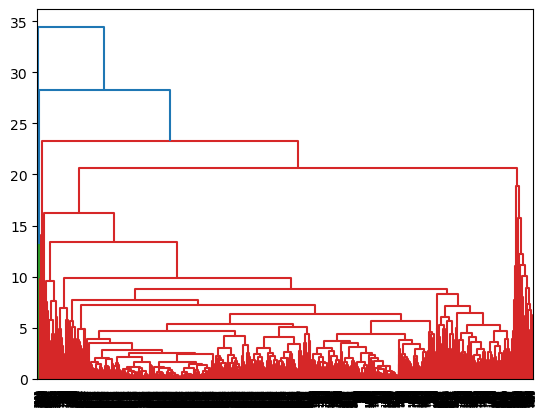

In [21]:
dendrogram = hierarchy.dendrogram(lk)

In [22]:
# modal building 

from sklearn.cluster import AgglomerativeClustering

In [33]:
hc = AgglomerativeClustering(n_clusters=2)
ylabel = hc.fit_predict(x)

In [34]:
ylabel

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [35]:
df['h_cluster'] = ylabel
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [36]:
df.groupby('h_cluster').agg('mean')

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
h_cluster,,,,,,,,,,,,
0,1712.131788,117912.886093,366.377483,3.406623,1.000000,1.03245,37101.439735,19.037086,853.826490,2.483444,4688.513245,0.670861
1,2198.450783,46718.863399,9.274407,1.242266,1.023303,1.00000,5037.792688,7.091201,221.167135,0.700281,3772.785858,0.188027


In [38]:
df[df['h_cluster']==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,0
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,0
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,0
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,4002,57793,0,3,1,1,20959,15,1198,3,1424,1,0
3980,4003,28867,0,3,1,1,19169,28,0,0,1425,0,0
3985,4008,59017,0,4,1,1,34746,25,0,0,1418,0,0
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,0


In [40]:
df[df['h_cluster']==1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,1
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


# Kmeans Clustering

In [41]:
from sklearn.cluster import KMeans

In [42]:
km = KMeans()

k_cluster = km.fit_predict(x)

In [44]:
k_cluster

array([1, 1, 1, ..., 0, 7, 7])

In [45]:
wcss = []

for i in range(1,20):
    km=KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [46]:
wcss

[43988.99999999999,
 35409.51662986133,
 30899.253324696223,
 27446.064712299423,
 24541.32958204578,
 21090.16175216678,
 18891.54542180389,
 17316.782055953965,
 16043.228077658629,
 14730.50989148948,
 13707.819606952977,
 12946.92675229653,
 12427.825612805651,
 11976.067500855834,
 11453.552424811309,
 11207.684921129727,
 10771.43430051275,
 10439.327771646045,
 10182.188328958788]

In [47]:
# elbow Graph

Text(0, 0.5, 'Wcss')

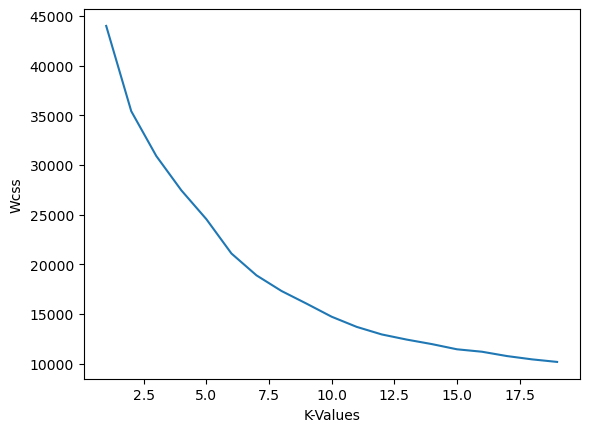

In [48]:
plt.plot(range(1,20),wcss)


plt.xlabel('K-Values')
plt.ylabel('Wcss')

In [54]:
km = KMeans(n_clusters=2)
ylabel=km.fit_predict(x)

In [55]:
ylabel

array([1, 1, 1, ..., 1, 1, 1])

In [56]:
df['k_cluster']=ylabel
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster,k_cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,1


In [57]:
df['k_cluster'].value_counts()

1    2697
0    1302
Name: k_cluster, dtype: int64

In [58]:
km.cluster_centers_

array([[ 0.58716103,  0.1467053 ,  1.1262893 , -0.03066175,  0.1259372 ,
         1.00495046,  0.91396585,  0.36236117,  0.40332941,  0.3977003 ,
         0.69999012],
       [-0.28377998, -0.07090394, -0.54434531,  0.01481909, -0.06086653,
        -0.48570121, -0.44172756, -0.17513227, -0.19493257, -0.19221198,
        -0.33831125]])

In [60]:
df.groupby('k_cluster').agg('mean')

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster
k_cluster,,,,,,,,,,,,,
0,1573.023041,132760.658986,257.798771,3.610599,1.009985,1.036866,41429.117512,20.380952,967.233487,2.902458,4942.417819,0.708909,0.040707
1,2228.100482,45041.650352,89.232481,1.310716,1.016685,1.000371,5421.404894,7.363737,215.211346,0.635521,3720.834631,0.206897,0.903226


# DBSCAN

In [61]:
from sklearn.cluster import DBSCAN

In [62]:
db = DBSCAN()
db.fit_predict(x)

array([ 0,  0,  0, ..., -1,  0,  0], dtype=int64)

In [123]:
db = DBSCAN(eps=1.5,min_samples=6)

y=db.fit_predict(x)

In [124]:
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [125]:
from sklearn.metrics import silhouette_score

In [126]:
silhouette_score(x,db.fit_predict(x))

0.25262647778840513

In [129]:
df['db_cluster'] = y
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster,k_cluster,db_cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,1,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,1,0


In [133]:
df.groupby('db_cluster').agg('mean')

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster,k_cluster
db_cluster,,,,,,,,,,,,,,
-1,1669.981538,210068.470769,1350.024615,2.707692,1.083077,1.150769,44352.092308,24.750769,2932.498462,8.560000,4792.806154,0.738462,0.095385,0.147692
0,2180.459336,56534.562241,29.264315,1.684647,1.000000,1.000000,9592.504564,8.725726,172.370124,0.506224,3805.310788,0.000000,0.826556,0.865975
1,1773.916197,71668.506044,54.012087,2.637389,1.000000,1.000000,24795.691378,13.709106,378.717969,1.195004,4565.161160,1.000000,0.356970,0.434327
2,2453.933333,38556.733333,0.000000,1.000000,2.000000,1.000000,8951.533333,12.933333,60.000000,0.400000,3390.400000,0.000000,1.000000,1.000000
3,2671.625000,36524.250000,0.000000,1.000000,3.000000,1.000000,15518.500000,14.500000,50.000000,0.250000,3179.625000,0.000000,1.000000,1.000000
